In [1]:
import surp
import vice
import numpy as np

import matplotlib.pyplot as plt

from surp.gce_math import Z_to_MH, MH_to_Z
from surp.yields import calc_y

/astro/dboyea/.local/lib/python3.11/site-packages/vice-1.4.0.dev0-py3.11-linux-x86_64.egg/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [2]:
from singlezone import run_singlezone

In [3]:
import arya

In [4]:
surp.set_yields()

In [5]:
from scipy.optimize import curve_fit

In [6]:
from surp.agb_interpolator import interpolator as agb_interpolator

In [7]:
def get_yield_table(study, **kwargs):
    y1, m1, z1 = vice.yields.agb.grid("c", study=study)
    mh1 = Z_to_MH(z1)
    vice.yields.agb.settings["c"] = agb_interpolator("c", study=study, **kwargs)
    y_c_agb1 = np.array([calc_y(z, kind="agb") for z in z1])

    return mh1, y_c_agb1, None, None

In [8]:
obs = get_yield_table("cristallo11")

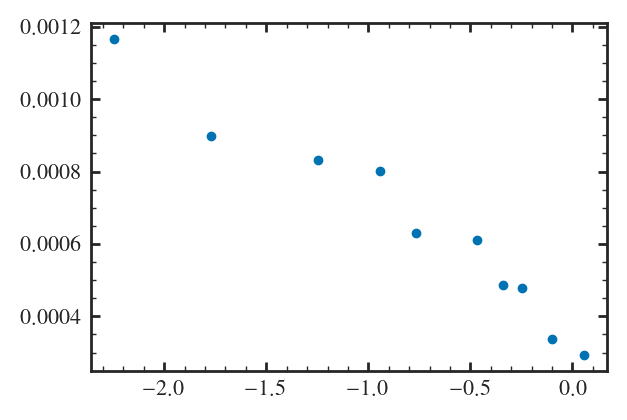

In [9]:
plt.scatter(obs[0], obs[1])

In [10]:
def lin_ls(x, a, b):
    return a + b*x

def quad_ls(x, a, b, c):
    return a + b*x + c*x**2

def exp_ls(x, a, b, c):
    return a + b*np.exp(c*x)


In [11]:
def fit_ls(obs, model, p0=None, color=arya.COLORS[1], **kwargs):
    popt, covt = curve_fit(model, obs[0], obs[1], p0=None)

    for i in range(len(popt)):
        print(["zeta0", "zeta1"][i], f":\t{popt[i]:8.3e}  ±  {np.sqrt(covt[i,i]):8.3e}")

    x = np.linspace(np.min(obs[0]), np.max(obs[0]), 1000)
    y = model(x, *popt)
    plt.plot(x, y, color=color, **kwargs)

    return popt

In [26]:
vice.yields.ccsne.settings["c"] = 0

study cristallo11
y0 =  3.1129493590761443
zeta0 :	3.691e-04  ±  3.075e-05
zeta1 :	-3.526e-04  ±  2.854e-05


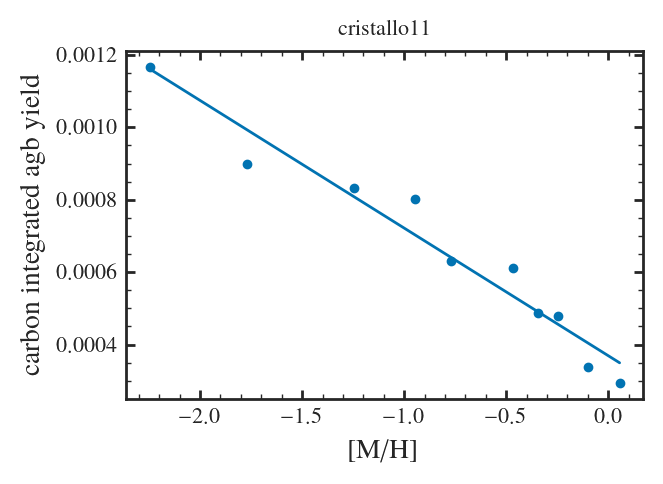


study ventura13
y0 =  -0.008581162077687492
zeta0 :	9.563e-05  ±  1.896e-04
zeta1 :	-1.030e-03  ±  2.632e-04


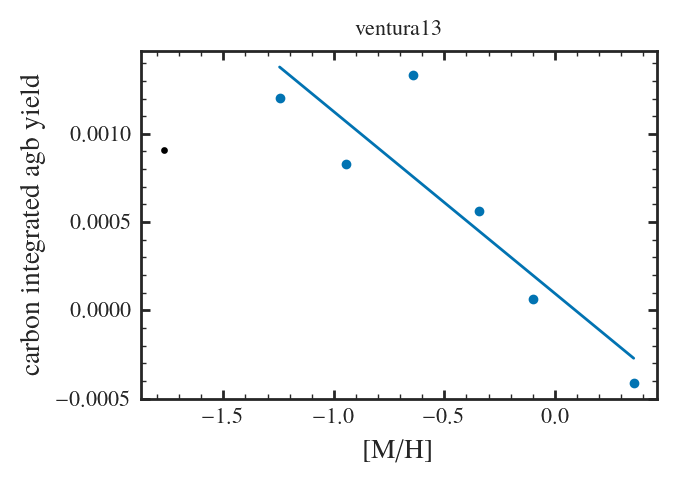


study karakas16
y0 =  2.9555471423535664
zeta0 :	2.338e-04  ±  4.869e-05
zeta1 :	-1.103e-03  ±  1.049e-04


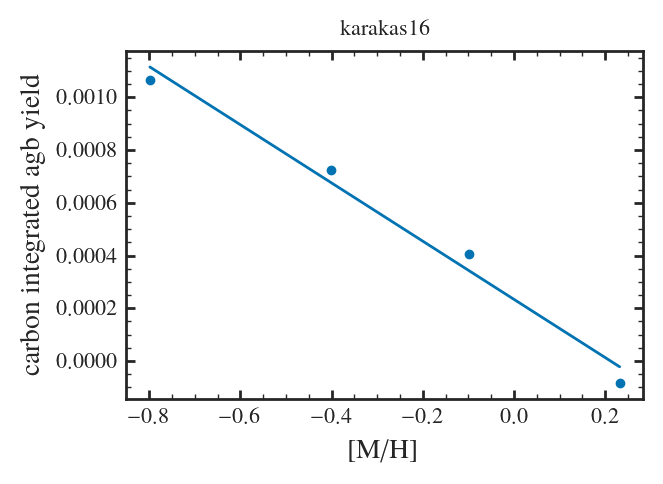


study battino19
y0 =  9.248417861815101
zeta0 :	8.100e-04  ±  1.945e-04
zeta1 :	-4.649e-04  ±  1.659e-04


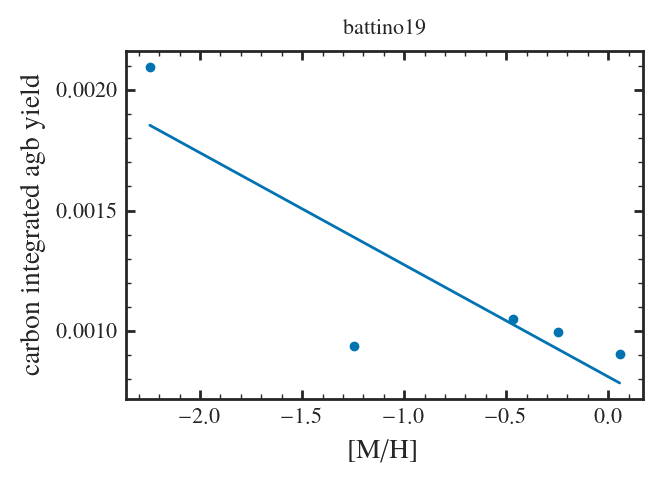

In [30]:
for study in surp.AGB_MODELS:
    print("study", study)
    obs = get_yield_table(study)


    if study == "ventura13":
        # remove lowest Z point
        plt.scatter(obs[0][0], obs[1][0], color="k", s=2)
        
        obs = (obs[0][1:], obs[1][1:], None, None)
        
    plt.scatter(obs[0], obs[1])
    vice.yields.agb.settings["c"] = agb_interpolator("c", study=study)
    print("y0 = ", calc_y(ele="c") * 1e4)
    a, b = fit_ls(obs, lin_ls, color=None)

    plt.xlabel("[M/H]")
    plt.ylabel("carbon integrated agb yield")
    plt.title(study)
    plt.show()

    print()

In [20]:
alpha_0 = 2.40
a_0 = 0.369

In [21]:
y_tot = (alpha_0 * a_0 + 1.90)

In [22]:
f_agb = alpha_0 * a_0 / y_tot

mass factor =  0.5
y0 =  2.832489228255587
zeta0 :	3.287e-04  ±  2.396e-05
zeta1 :	-1.805e-04  ±  2.224e-05
alpha =  2.6942026131929686

mass factor =  0.7
y0 =  3.604729682654721
zeta0 :	4.194e-04  ±  3.055e-05
zeta1 :	-3.131e-04  ±  2.835e-05
alpha =  2.1117949591093366

mass factor =  1
y0 =  3.1129493590761443
zeta0 :	3.691e-04  ±  3.075e-05
zeta1 :	-3.526e-04  ±  2.854e-05
alpha =  2.3991638521071166

mass factor =  1.5
y0 =  3.119140467531549
zeta0 :	3.405e-04  ±  2.464e-05
zeta1 :	-2.979e-04  ±  2.287e-05
alpha =  2.600610132829462

mass factor =  2
y0 =  3.0021272144961295
zeta0 :	3.222e-04  ±  2.042e-05
zeta1 :	-2.268e-04  ±  1.895e-05
alpha =  2.748682574712448



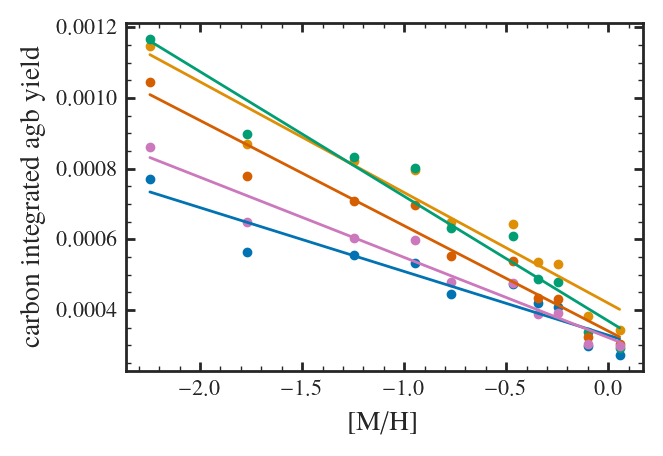

In [29]:
for mass_factor in [0.5, 0.7, 1,1.5, 2]:
    print("mass factor = ", mass_factor)
    obs = get_yield_table("cristallo11", mass_factor=mass_factor)
    vice.yields.agb.settings["c"] = agb_interpolator("c", study="cristallo11", mass_factor = mass_factor)
    print("y0 = ", calc_y(ele="c") * 1e4)
    a, b = fit_ls(obs, lin_ls, color=None)
    plt.scatter(obs[0], obs[1])

    alpha_exp = alpha_0 * a_0 /  (a) / 1e3
    print("alpha = ", alpha_exp)

    plt.xlabel("[M/H]")
    plt.ylabel("carbon integrated agb yield")
    print()